In [1]:
library(REdaS)
library(MASS)
library(psych)

Loading required package: grid



In [2]:
#Input Data
data(Investment, package="sandwich")
data <- as.data.frame(Investment[,1:6])

In [3]:
countries <- c('Algeria', 'Cameroon', 'Madagascar', 'Mauritius', 'Reunion', 'Seychelles', 'South Africa (C)',
               'South Africa (W)', 'Tunisia', 'Canada', 'Costa Rica', 'Dominican Rep.')
m0 <- c(63,34,38,59,56,62,50,65,56,69,65,64)
m25 <- c(51,29,30,42,38,44,39,44,46,47,48,50)
m50 <- c(30,13,17,20,18,24,20,22,24,24,26,28)
m75 <- c(13,5,7,6,7,7,7,7,11,8,9,11)
w0 <- c(67,38,38,64,62,69,55,72,63,75,68,66)
w25 <- c(54,32,34,46,46,50,43,50,54,53,50,51)
w50 <- c(34,17,20,25,25,28,23,27,33,29,27,29)
w75 <- c(15,6,7,8,10,14,8,9,19,10,10,11)

data <- data.frame(countries,m0,m25,m50,m75,w0,w25,w50,w75)
data

countries,m0,m25,m50,m75,w0,w25,w50,w75
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Algeria,63,51,30,13,67,54,34,15
Cameroon,34,29,13,5,38,32,17,6
Madagascar,38,30,17,7,38,34,20,7
Mauritius,59,42,20,6,64,46,25,8
Reunion,56,38,18,7,62,46,25,10
Seychelles,62,44,24,7,69,50,28,14
South Africa (C),50,39,20,7,55,43,23,8
South Africa (W),65,44,22,7,72,50,27,9
Tunisia,56,46,24,11,63,54,33,19


In [4]:
data <- data[,-c(1)]
data

m0,m25,m50,m75,w0,w25,w50,w75
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,51,30,13,67,54,34,15
34,29,13,5,38,32,17,6
38,30,17,7,38,34,20,7
59,42,20,6,64,46,25,8
56,38,18,7,62,46,25,10
62,44,24,7,69,50,28,14
50,39,20,7,55,43,23,8
65,44,22,7,72,50,27,9
56,46,24,11,63,54,33,19


In [5]:
#standardisasi data
data<-data.frame(scale(data))
head(data)

,m0,m25,m50,m75,w0,w25,w50,w75
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.56919839,1.20749295,1.6185042,2.0413518,0.46339226,0.9680708,1.5511273,1.1845777
2,-2.07188213,-1.85768146,-1.8939943,-1.3374374,-1.94348096,-2.0386431,-1.9261251,-1.2292788
3,-1.70759516,-1.71835535,-1.0675240,-0.4927401,-1.94348096,-1.7653055,-1.3124923,-0.9610725
4,0.20491142,-0.04644204,-0.4476714,-0.9150887,0.21440537,-0.1252797,-0.2897710,-0.6928662
5,-0.06830381,-0.60374647,-0.8609065,-0.4927401,0.04841412,-0.1252797,-0.2897710,-0.1564537
6,0.47812665,0.23221018,0.3787989,-0.4927401,0.62938351,0.4213955,0.3238617,0.9163714


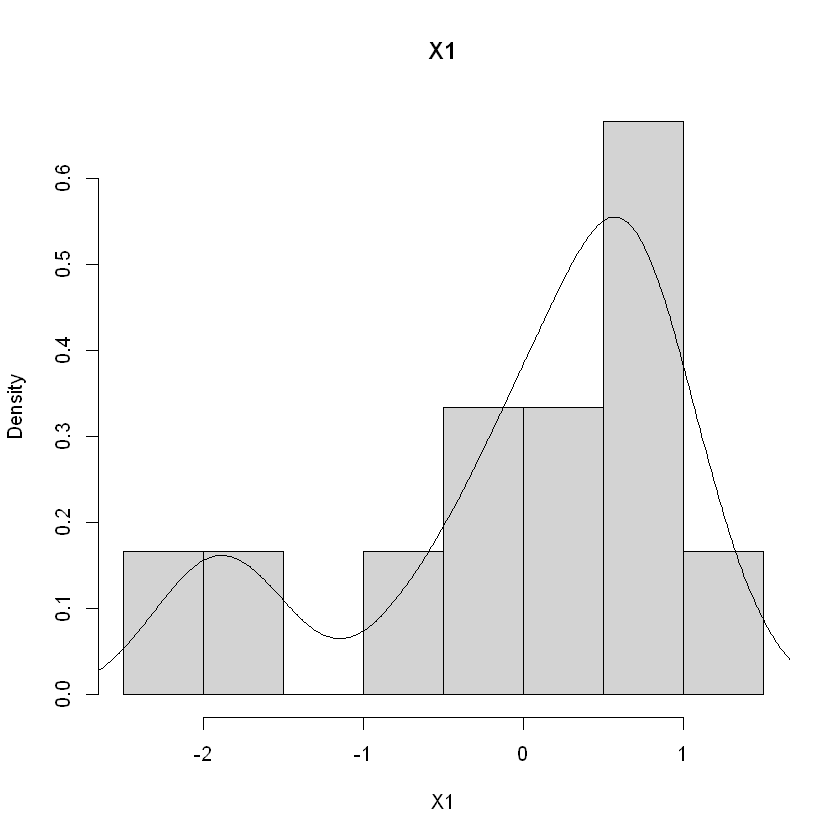

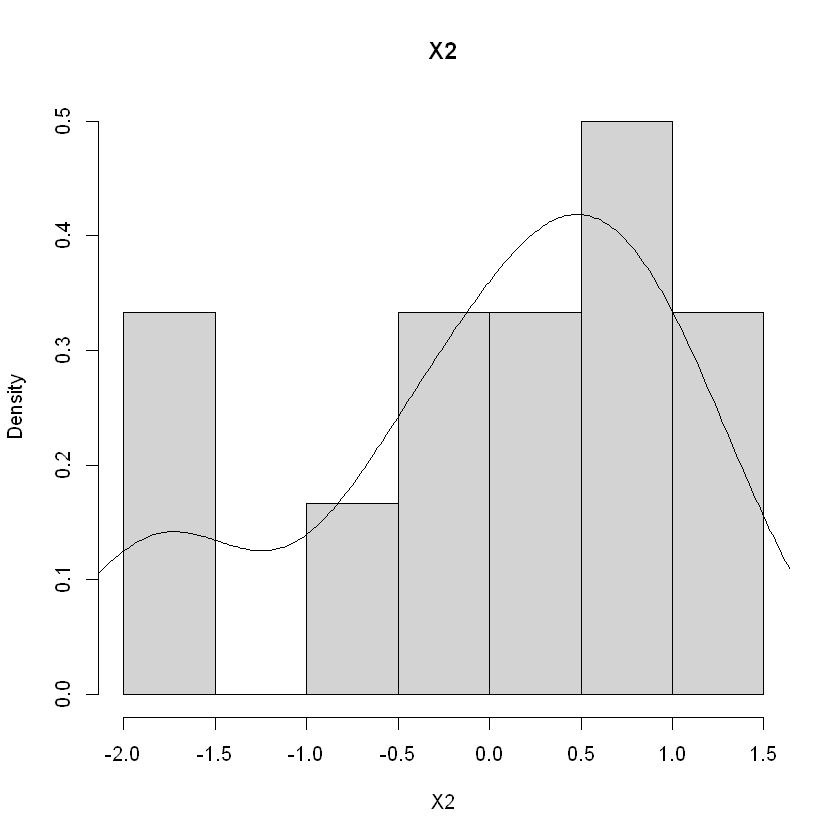

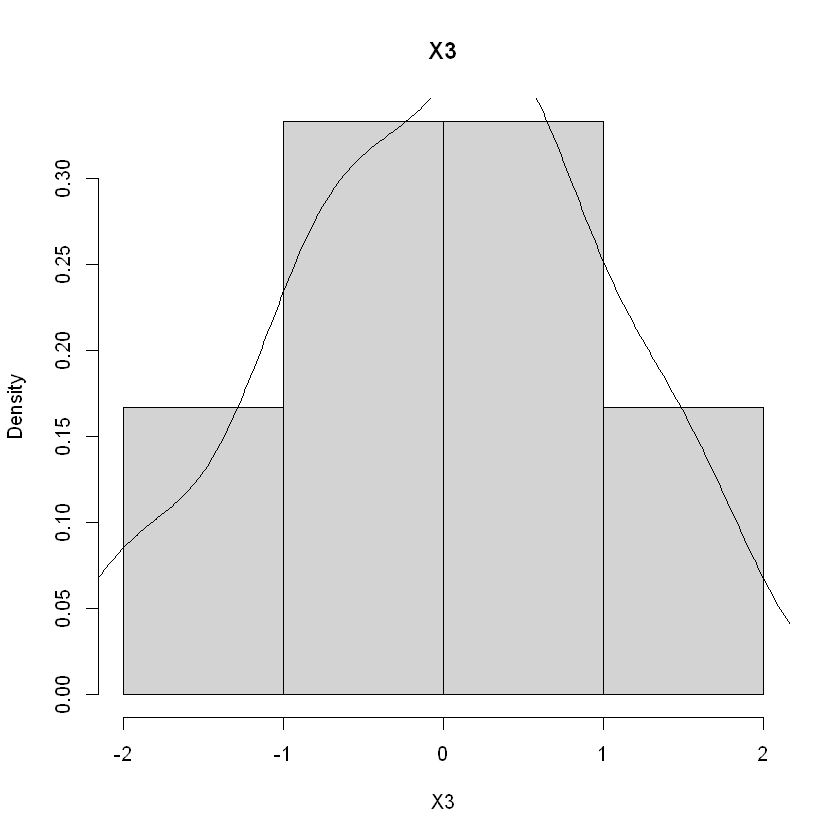

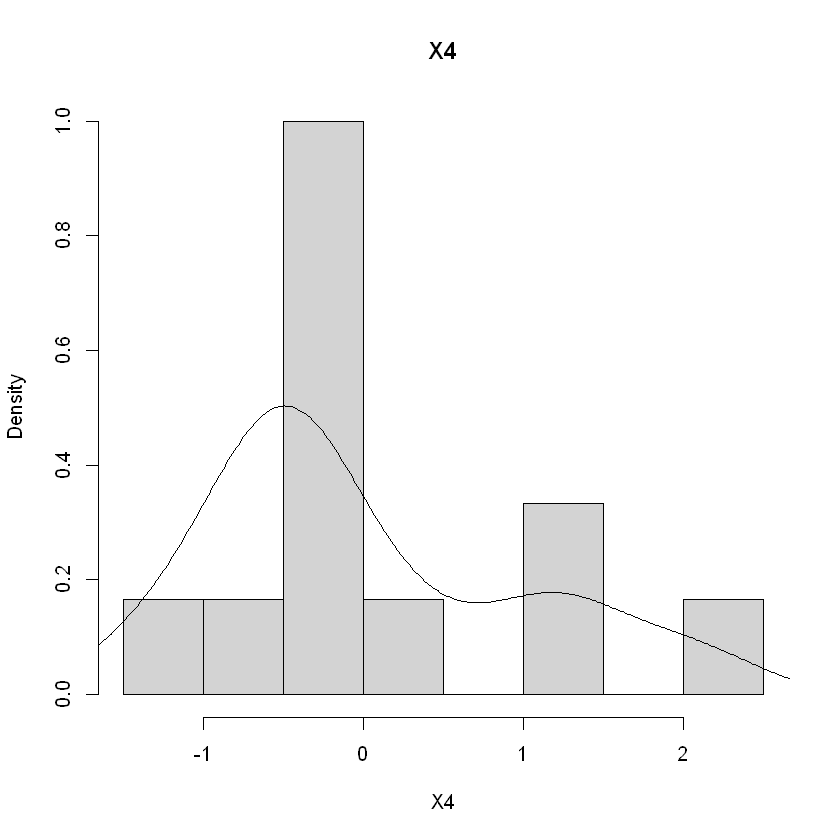

In [6]:
#cek histogram dan kurva setiap variabel
hist(data[,1], prob=TRUE, main="X1", xlab="X1")
lines(density(data[,1]))
hist(data[,2], prob=TRUE, main="X2", xlab="X2")
lines(density(data[,2]))
hist(data[,3], prob=TRUE, main="X3", xlab="X3")
lines(density(data[,3]))
hist(data[,4], prob=TRUE, main="X4", xlab="X4")
lines(density(data[,4]))

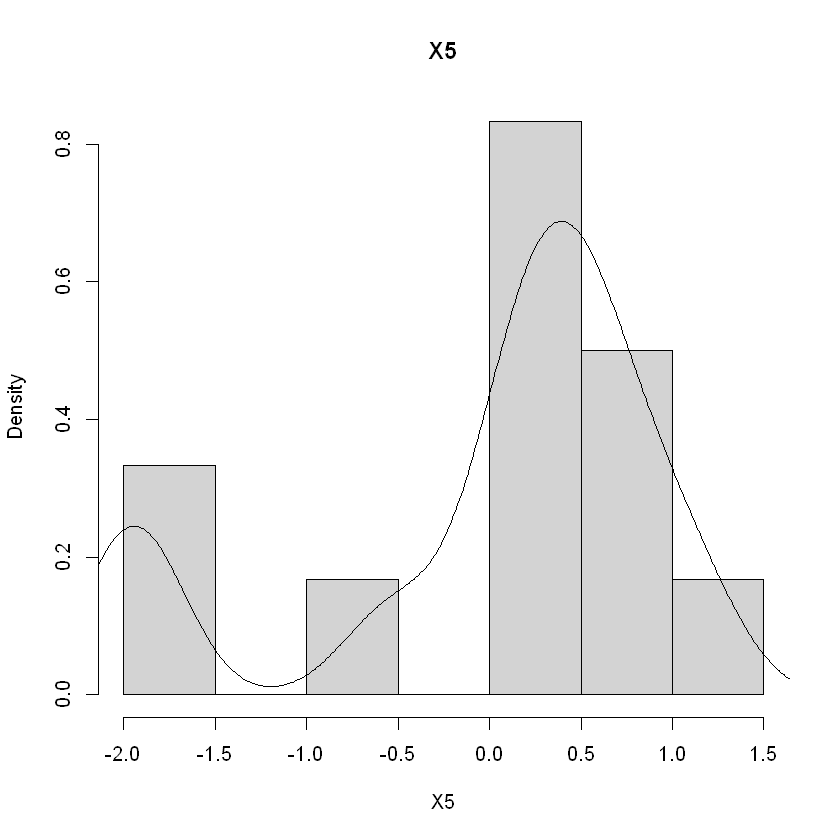

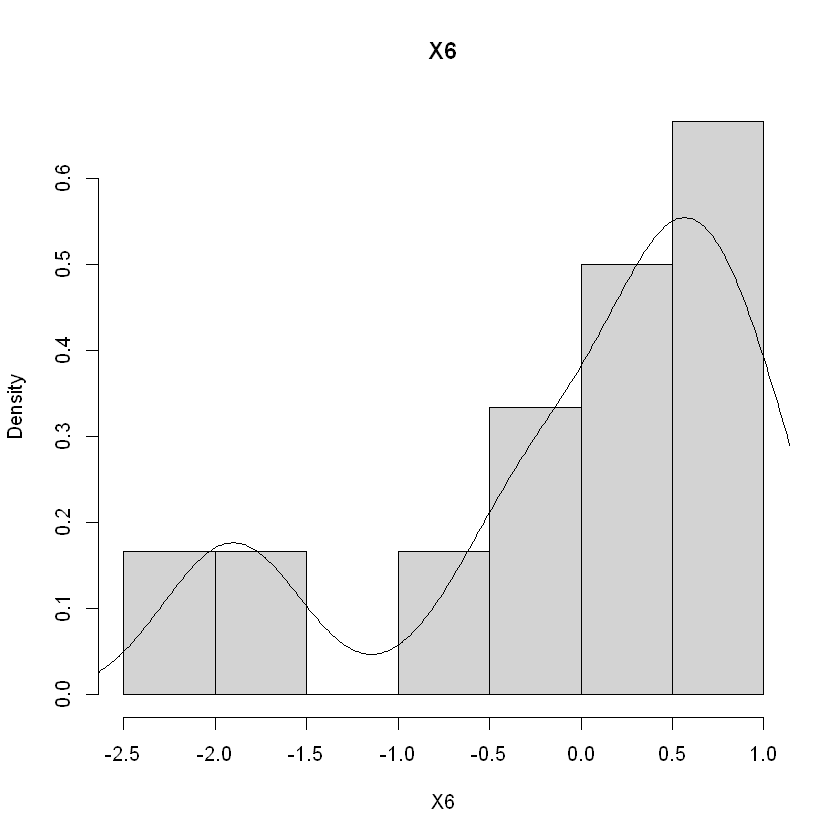

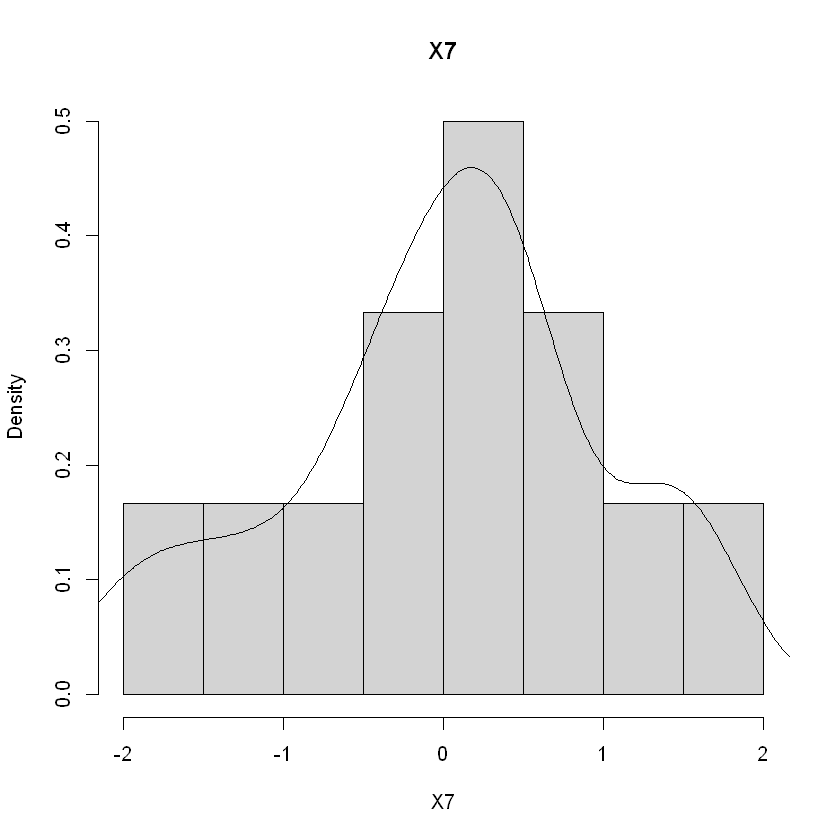

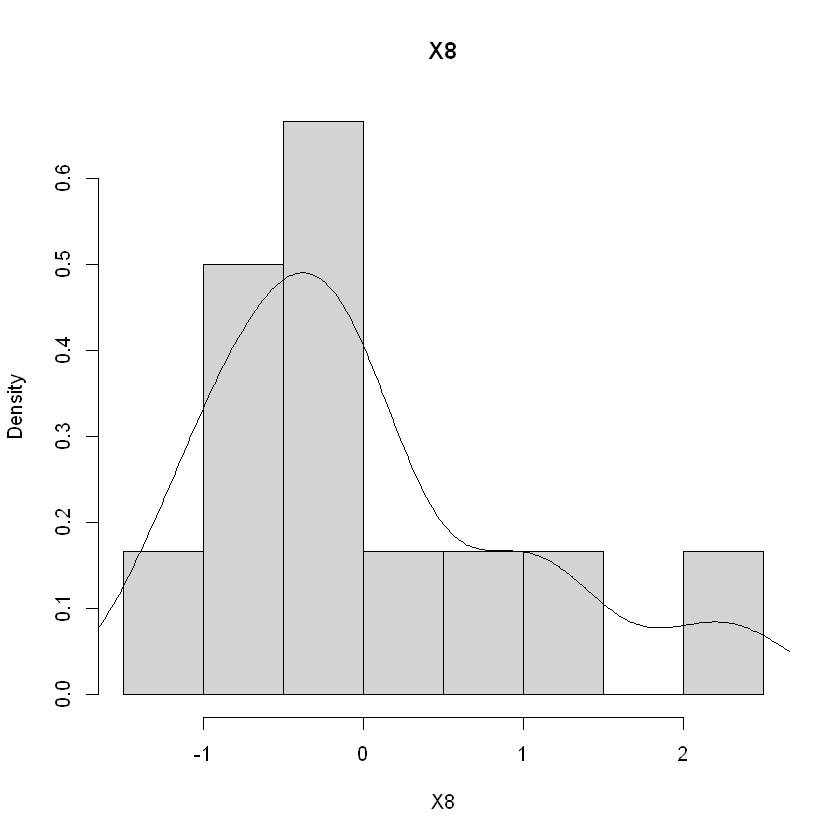

In [7]:
hist(data[,5], prob=TRUE, main="X5", xlab="X5")
lines(density(data[,5]))
hist(data[,6], prob=TRUE, main="X6", xlab="X6")
lines(density(data[,6]))
hist(data[,7], prob=TRUE, main="X7", xlab="X7")
lines(density(data[,7]))
hist(data[,8], prob=TRUE, main="X8", xlab="X8")
lines(density(data[,8]))

In [8]:
#normality test
library(MVN)
result <- mvn(data =data,mvnTest = "mardia")
result

$multivariateNormality
             Test         Statistic           p value Result
1 Mardia Skewness   138.33873195999 0.120829657230273    YES
2 Mardia Kurtosis -1.30260122836326 0.192710938202482    YES
3             MVN              <NA>              <NA>    YES

$univariateNormality
              Test  Variable Statistic   p value Normality
1 Anderson-Darling    m0        0.7453    0.0376    NO    
2 Anderson-Darling    m25       0.4320    0.2530    YES   
3 Anderson-Darling    m50       0.1646    0.9207    YES   
4 Anderson-Darling    m75       0.7242    0.0428    NO    
5 Anderson-Darling    w0        0.9226    0.0127    NO    
6 Anderson-Darling    w25       0.7913    0.0283    NO    
7 Anderson-Darling    w50       0.2244    0.7706    YES   
8 Anderson-Darling    w75       0.5168    0.1503    YES   

$Descriptives
     n          Mean Std.Dev     Median       Min       Max        25th
m0  12  0.000000e+00       1  0.3415190 -2.071882 1.1156288 -0.20491142
m25 12 -3.405389e-16       1  0.2322102 -1.857681 1.2074929 -0.49925189
m50 12 -2.451652e-16       1  0.1721813 -1.893994 1.6185042 -0.55098015
m75 12  2.289835e-16       1 -0.4927401 -1.337437 2.0413518 -0.49274009
w0  12  2.116363e-16       1  0.2974010 -1.943481 1.1273573 -0.09682823
w25 12  3.099779e-16       1  0.4213955 -2.038643 0.9680708 -0.22778135
w50 12 -2.428613e-16       1  0.1193175 -1.926125 1.5511273 -0.39204315
w75 12 -1.491862e-16       1 -0.1564537 -1.229279 2.2574028 -0.69286621
         75th       Skew   Kurtosis
m0  0.6830381 -0.9399209 -0.5326708
m25 0.6850200 -0.6583614 -0.9269783
m50 0.4821076 -0.1814772 -0.9813260
m75 0.5631315  0.6850165 -0.8602563
w0  0.5671368 -1.0119037 -0.4050227
w25 0.6263987 -0.9453181 -0.5422707
w50 0.5284060 -0.2742159 -0.8143293
w75 0.3129073  0.8698292 -0.3104910

In [9]:
#Bartlett test dan KMO
bart_spher(data)
KMO(data)

	Bartlett's Test of Sphericity

Call: bart_spher(x = data)

     X2 = 171.485
     df = 28
p-value < 2.22e-16

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = data)
Overall MSA =  0.77
MSA for each item = 
  m0  m25  m50  m75   w0  w25  w50  w75 
0.80 0.80 0.74 0.73 0.77 0.75 0.89 0.69 

In [10]:
#Analisis Faktor
R<-cov(data)
eigen<-eigen(R)
eigen

eigen() decomposition
$values
[1] 6.511080569 1.008772479 0.393991114 0.053555658 0.018598879 0.009567193
[7] 0.002605459 0.001828649

$vectors
           [,1]        [,2]        [,3]        [,4]        [,5]        [,6]
[1,] -0.3486081  0.44948287 -0.03419857 -0.04807949  0.31292936  0.38640895
[2,] -0.3825963  0.10719566 -0.23253736  0.21101139 -0.76480569 -0.22625685
[3,] -0.3691220 -0.08578984 -0.45362827  0.63066757  0.38242139 -0.10130373
[4,] -0.3102859 -0.52711366 -0.44636700 -0.48842242 -0.01522675  0.39682721
[5,] -0.3421420  0.46764416  0.19576228 -0.10462643  0.06977774  0.13484136
[6,] -0.3846303  0.12119298  0.20406775 -0.23912589 -0.23911329  0.04046371
[7,] -0.3815435 -0.16429791  0.17228340 -0.33475701  0.32789998 -0.73078988
[8,] -0.2983069 -0.49080844  0.65580991  0.36969498 -0.03327181  0.27908480
            [,7]       [,8]
[1,]  0.62551802 -0.1855988
[2,]  0.28410811  0.1633782
[3,] -0.28537464 -0.1221541
[4,] -0.04355184  0.1687407
[5,] -0.45907288  0.6173971
[6,]

In [14]:
factanal(x=data,factors=3,method="mle") # Ubah factors sesuai soal


Call:
factanal(x = data, factors = 3, method = "mle")

Uniquenesses:
   m0   m25   m50   m75    w0   w25   w50   w75 
0.005 0.020 0.030 0.028 0.005 0.005 0.010 0.065 

Loadings:
    Factor1 Factor2 Factor3
m0  0.948   0.272   0.152  
m25 0.758   0.563   0.298  
m50 0.592   0.736   0.278  
m75 0.180   0.840   0.483  
w0  0.958   0.152   0.236  
w25 0.794   0.362   0.484  
w50 0.587   0.503   0.627  
w75 0.234   0.347   0.872  

               Factor1 Factor2 Factor3
SS loadings      3.804   2.165   1.866
Proportion Var   0.475   0.271   0.233
Cumulative Var   0.475   0.746   0.979

Test of the hypothesis that 3 factors are sufficient.
The chi square statistic is 8.84 on 7 degrees of freedom.
The p-value is 0.264 

Terlihat bahwa faktor pertama didominasi oleh harapan hidup saat lahir bagi laki-laki (0.948) dan perempuan (0.958); mungkin faktor ini bisa diberi label "ketahanan hidup
saat lahir" <br>
Yang kedua mencerminkan harapan hidup pada usia yang lebih tua pada laki-laki (0.736 dan 0.840), kita mungkin dapat menyebutnya "ketahanan hidup laki-laki". <br>
Faktor ketiga dari rotasi varimax memiliki beban tertinggi untuk harapan hidup perempuan berusia 50 dan 75 dan dalam nada yang sama mungkin diberi label
“ketahanan hidup untuk perempuan lanjut usia”.